In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

from keras import models
from keras import layers
import os
import numpy as np
from keras import optimizers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 771       
Total params: 16,812,867
Trainable params: 16,812,867
Non-trainable params: 0
_________________________________________________________________


In [2]:
conv_base.trainable = False #동결 설정을 위해 
base_dir = './dataset4'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

batch_size = 20
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지의 크기를 150 × 150로 변경합니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하므로 이진 레이블이 필요합니다
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=2e-5),#optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=25,
      epochs=500,
      validation_data=validation_generator,
      validation_steps=3,
      verbose=2)

model.save('capstone_vgg16_false_0210.h5',include_optimizer=False)
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

Found 1193 images belonging to 3 classes.
Found 210 images belonging to 3 classes.
Epoch 1/500
 - 48s - loss: 1.0998 - acc: 0.4084 - val_loss: 0.9762 - val_acc: 0.5524
Epoch 2/500


/home/marvel/anaconda3/envs/venv/lib/python3.5/site-packages/PIL/Image.py:931: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


 - 45s - loss: 0.9753 - acc: 0.5600 - val_loss: 0.8908 - val_acc: 0.6048
Epoch 3/500
 - 45s - loss: 0.9358 - acc: 0.5720 - val_loss: 0.8052 - val_acc: 0.6714
Epoch 4/500
 - 45s - loss: 0.9036 - acc: 0.5696 - val_loss: 0.7652 - val_acc: 0.6857
Epoch 5/500
 - 44s - loss: 0.8462 - acc: 0.6360 - val_loss: 0.7016 - val_acc: 0.7429
Epoch 6/500
 - 46s - loss: 0.8034 - acc: 0.6637 - val_loss: 0.6801 - val_acc: 0.7619
Epoch 7/500
 - 44s - loss: 0.7889 - acc: 0.6640 - val_loss: 0.6257 - val_acc: 0.8095
Epoch 8/500
 - 47s - loss: 0.7897 - acc: 0.6580 - val_loss: 0.6245 - val_acc: 0.7667
Epoch 9/500
 - 44s - loss: 0.7819 - acc: 0.6620 - val_loss: 0.6138 - val_acc: 0.7667
Epoch 10/500
 - 43s - loss: 0.7292 - acc: 0.6998 - val_loss: 0.5967 - val_acc: 0.8000
Epoch 11/500
 - 46s - loss: 0.7311 - acc: 0.6957 - val_loss: 0.6018 - val_acc: 0.7571
Epoch 12/500
 - 45s - loss: 0.7522 - acc: 0.6800 - val_loss: 0.5897 - val_acc: 0.7762
Epoch 13/500
 - 45s - loss: 0.7232 - acc: 0.6940 - val_loss: 0.5832 - val_

Epoch 98/500
 - 45s - loss: 0.3607 - acc: 0.8729 - val_loss: 0.4462 - val_acc: 0.8286
Epoch 99/500
 - 45s - loss: 0.3480 - acc: 0.8800 - val_loss: 0.4827 - val_acc: 0.8143
Epoch 100/500
 - 44s - loss: 0.3120 - acc: 0.9129 - val_loss: 0.4455 - val_acc: 0.8238
Epoch 101/500
 - 44s - loss: 0.3674 - acc: 0.8820 - val_loss: 0.5413 - val_acc: 0.7905
Epoch 102/500
 - 44s - loss: 0.3432 - acc: 0.8768 - val_loss: 0.4841 - val_acc: 0.8143
Epoch 103/500
 - 44s - loss: 0.3542 - acc: 0.8760 - val_loss: 0.4362 - val_acc: 0.8190
Epoch 104/500
 - 45s - loss: 0.3184 - acc: 0.8899 - val_loss: 0.4373 - val_acc: 0.8333
Epoch 105/500
 - 45s - loss: 0.3667 - acc: 0.8580 - val_loss: 0.4404 - val_acc: 0.8333
Epoch 106/500
 - 45s - loss: 0.3247 - acc: 0.8980 - val_loss: 0.4520 - val_acc: 0.8190
Epoch 107/500
 - 43s - loss: 0.3268 - acc: 0.9019 - val_loss: 0.4408 - val_acc: 0.8381
Epoch 108/500
 - 44s - loss: 0.3231 - acc: 0.8920 - val_loss: 0.4355 - val_acc: 0.8238
Epoch 109/500
 - 46s - loss: 0.3145 - acc: 0.

Epoch 193/500
 - 45s - loss: 0.2318 - acc: 0.9320 - val_loss: 0.4557 - val_acc: 0.8190
Epoch 194/500
 - 47s - loss: 0.2524 - acc: 0.9300 - val_loss: 0.4423 - val_acc: 0.8333
Epoch 195/500
 - 48s - loss: 0.2165 - acc: 0.9460 - val_loss: 0.4443 - val_acc: 0.8190
Epoch 196/500
 - 47s - loss: 0.2228 - acc: 0.9440 - val_loss: 0.4833 - val_acc: 0.8095
Epoch 197/500
 - 46s - loss: 0.2395 - acc: 0.9260 - val_loss: 0.4384 - val_acc: 0.8429
Epoch 198/500
 - 46s - loss: 0.2092 - acc: 0.9540 - val_loss: 0.4671 - val_acc: 0.8286
Epoch 199/500
 - 47s - loss: 0.2393 - acc: 0.9280 - val_loss: 0.4474 - val_acc: 0.8333
Epoch 200/500
 - 48s - loss: 0.2329 - acc: 0.9260 - val_loss: 0.4190 - val_acc: 0.8381
Epoch 201/500
 - 46s - loss: 0.2163 - acc: 0.9420 - val_loss: 0.4587 - val_acc: 0.8381
Epoch 202/500
 - 46s - loss: 0.2374 - acc: 0.9240 - val_loss: 0.4775 - val_acc: 0.8190
Epoch 203/500
 - 43s - loss: 0.2066 - acc: 0.9369 - val_loss: 0.4329 - val_acc: 0.8429
Epoch 204/500
 - 44s - loss: 0.2008 - acc: 

Epoch 288/500
 - 45s - loss: 0.1432 - acc: 0.9820 - val_loss: 0.4994 - val_acc: 0.8238
Epoch 289/500
 - 47s - loss: 0.1481 - acc: 0.9600 - val_loss: 0.4722 - val_acc: 0.8286
Epoch 290/500
 - 46s - loss: 0.1652 - acc: 0.9509 - val_loss: 0.5384 - val_acc: 0.7905
Epoch 291/500
 - 49s - loss: 0.1537 - acc: 0.9580 - val_loss: 0.4585 - val_acc: 0.8429
Epoch 292/500
 - 47s - loss: 0.1541 - acc: 0.9640 - val_loss: 0.4699 - val_acc: 0.8286
Epoch 293/500
 - 48s - loss: 0.1459 - acc: 0.9740 - val_loss: 0.5008 - val_acc: 0.8286
Epoch 294/500
 - 46s - loss: 0.1379 - acc: 0.9699 - val_loss: 0.5162 - val_acc: 0.8190
Epoch 295/500
 - 46s - loss: 0.1540 - acc: 0.9680 - val_loss: 0.5047 - val_acc: 0.8143
Epoch 296/500
 - 47s - loss: 0.1438 - acc: 0.9740 - val_loss: 0.4926 - val_acc: 0.8190
Epoch 297/500
 - 45s - loss: 0.1363 - acc: 0.9720 - val_loss: 0.5294 - val_acc: 0.7952
Epoch 298/500
 - 45s - loss: 0.1599 - acc: 0.9580 - val_loss: 0.5025 - val_acc: 0.8286
Epoch 299/500
 - 45s - loss: 0.1494 - acc: 

Epoch 383/500
 - 44s - loss: 0.1196 - acc: 0.9760 - val_loss: 0.4978 - val_acc: 0.8286
Epoch 384/500
 - 45s - loss: 0.1129 - acc: 0.9700 - val_loss: 0.5051 - val_acc: 0.8286
Epoch 385/500
 - 44s - loss: 0.1098 - acc: 0.9840 - val_loss: 0.5223 - val_acc: 0.8190
Epoch 386/500
 - 44s - loss: 0.1166 - acc: 0.9800 - val_loss: 0.5311 - val_acc: 0.7905
Epoch 387/500
 - 44s - loss: 0.1346 - acc: 0.9709 - val_loss: 0.4846 - val_acc: 0.8238
Epoch 388/500
 - 44s - loss: 0.1164 - acc: 0.9740 - val_loss: 0.4920 - val_acc: 0.8238
Epoch 389/500
 - 46s - loss: 0.1360 - acc: 0.9620 - val_loss: 0.5053 - val_acc: 0.8286
Epoch 390/500
 - 43s - loss: 0.1234 - acc: 0.9760 - val_loss: 0.4721 - val_acc: 0.8238
Epoch 391/500
 - 43s - loss: 0.1337 - acc: 0.9629 - val_loss: 0.4837 - val_acc: 0.8190
Epoch 392/500
 - 46s - loss: 0.1218 - acc: 0.9720 - val_loss: 0.4857 - val_acc: 0.8143
Epoch 393/500
 - 44s - loss: 0.0961 - acc: 0.9740 - val_loss: 0.5009 - val_acc: 0.8190
Epoch 394/500
 - 44s - loss: 0.1134 - acc: 

Epoch 478/500
 - 44s - loss: 0.0969 - acc: 0.9720 - val_loss: 0.5307 - val_acc: 0.8000
Epoch 479/500
 - 43s - loss: 0.0961 - acc: 0.9800 - val_loss: 0.5096 - val_acc: 0.8238
Epoch 480/500
 - 44s - loss: 0.0924 - acc: 0.9840 - val_loss: 0.4718 - val_acc: 0.8524
Epoch 481/500
 - 43s - loss: 0.0872 - acc: 0.9820 - val_loss: 0.5021 - val_acc: 0.8333
Epoch 482/500
 - 45s - loss: 0.0963 - acc: 0.9760 - val_loss: 0.5006 - val_acc: 0.8333
Epoch 483/500
 - 45s - loss: 0.0915 - acc: 0.9750 - val_loss: 0.4939 - val_acc: 0.8238
Epoch 484/500
 - 44s - loss: 0.0855 - acc: 0.9820 - val_loss: 0.5569 - val_acc: 0.8048
Epoch 485/500
 - 44s - loss: 0.0782 - acc: 0.9880 - val_loss: 0.5789 - val_acc: 0.8143
Epoch 486/500
 - 45s - loss: 0.0923 - acc: 0.9840 - val_loss: 0.5397 - val_acc: 0.8095
Epoch 487/500
 - 42s - loss: 0.0845 - acc: 0.9880 - val_loss: 0.5124 - val_acc: 0.8190
Epoch 488/500
 - 47s - loss: 0.0727 - acc: 0.9900 - val_loss: 0.5998 - val_acc: 0.7905
Epoch 489/500
 - 45s - loss: 0.0892 - acc: 

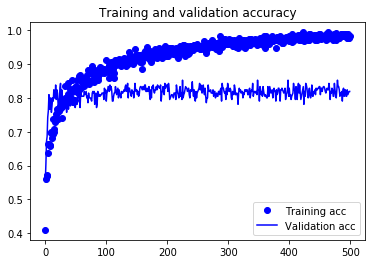

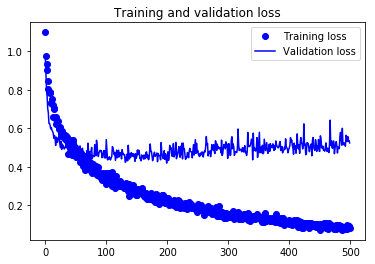

In [3]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()